<a href="https://colab.research.google.com/github/sajla97k/Python-ML/blob/main/disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

%matplotlib inline


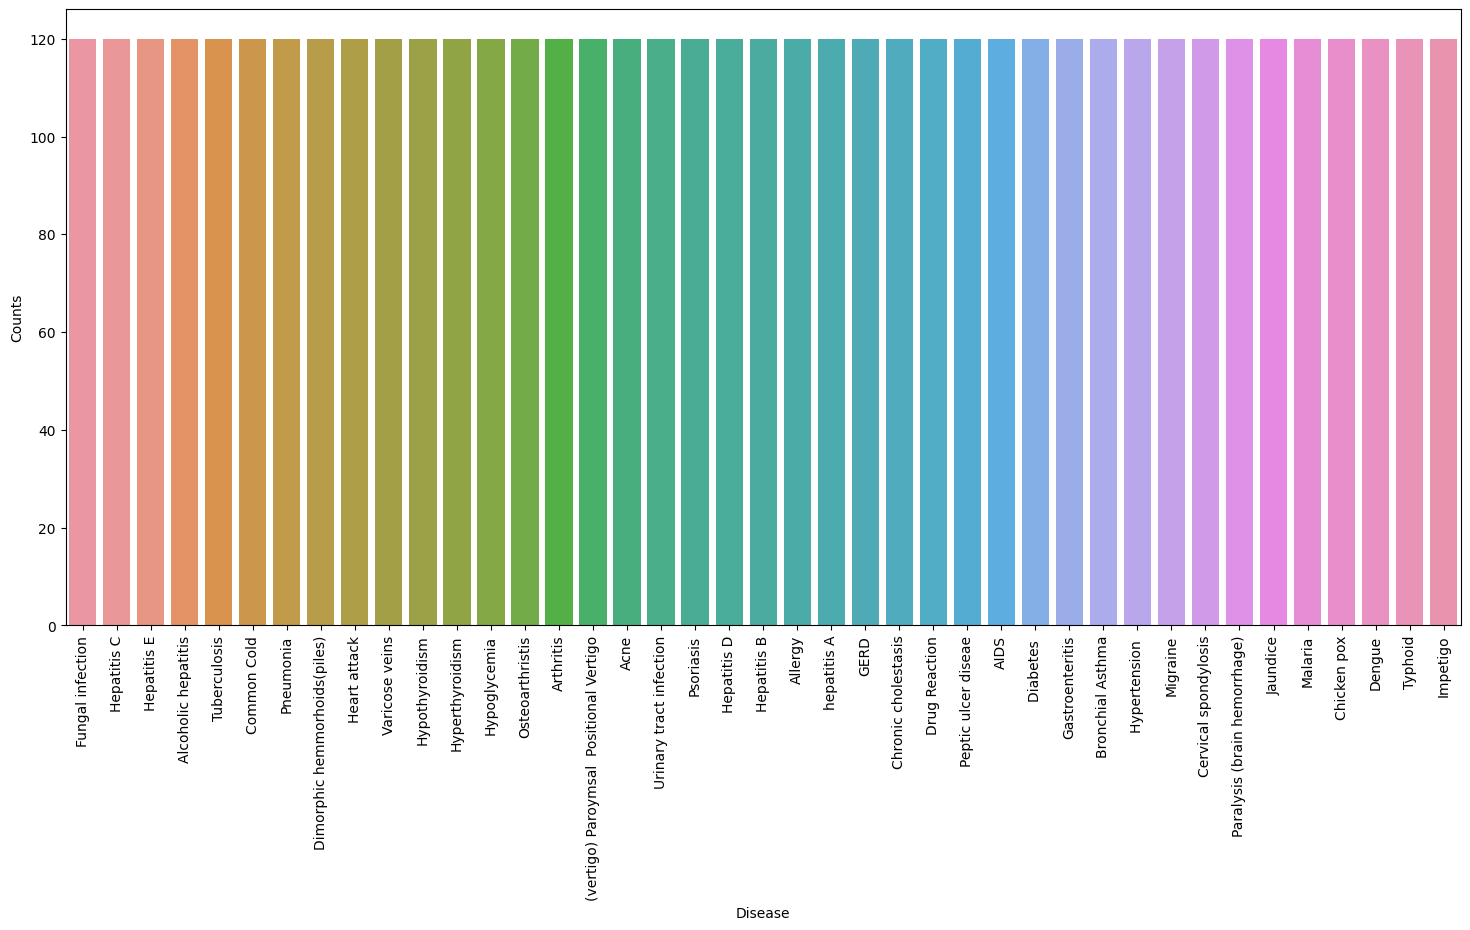

In [ ]:
# Reading the train.csv by removing the
# last column since it's an empty column

d = pd.read_csv("/content/drive/MyDrive/PROJECT ML/Training.csv").dropna(axis=1)
d.head(2)

# Checking whether the dataset is balanced or not
disease_counts = d["prognosis"].value_counts()
temp_df = pd.DataFrame({
	"Disease": disease_counts.index,
	"Counts": disease_counts.values
})

plt.figure(figsize = (18,8))
sns.barplot(x = "Disease", y = "Counts", data = temp_df)
plt.xticks(rotation=90)
plt.show()


In [ ]:
d.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
d.isna().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [ ]:
# Encoding the target value into numerical
# value using LabelEncoder
encoder = LabelEncoder()
d["prognosis"] = encoder.fit_transform(d["prognosis"])


In [ ]:
x = d.iloc[:,:-1]
y = d.iloc[:, -1]





In [ ]:
#data splitting for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 0)

In [ ]:
# Defining scoring metric for k-fold cross validation
def cv_scoring(estimator, x, y):
	return accuracy_score(y, estimator.predict(X))

# Initializing Models
models = {
	"SVC":SVC(),
	"Gaussian NB":GaussianNB(),
	"Random Forest":RandomForestClassifier(random_state=18)
}

# Producing cross validation score for the models
for model_name in models:
	model = models[model_name]
	scores = cross_val_score(model, x, y, cv = 10,
							n_jobs = -1,
							scoring = cv_scoring)
	print("=="*30)
	print(model_name)
	print(f"Scores: {scores}")
	print(f"Mean Score: {np.mean(scores)}")


SVC
Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean Score: nan
Gaussian NB
Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean Score: nan
Random Forest
Scores: [nan nan nan nan nan nan nan nan nan nan]
Mean Score: nan


In [ ]:
# Import the sklearn necessary libraries

from sklearn.linear_model import LinearRegression
# Create a linear regression model

Lr_model = LinearRegression()
# Fit the model to the training data

Lr_model.fit(x_train,y_train)
# Predict the prices on the test data

y_pred = Lr_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
training_score_1 = Lr_model.score(x_train,y_train)
training_score_1

0.9784034292268406

In [ ]:
testing_score_1 = Lr_model.score(x_test,y_test)
testing_score_1

0.975315821276454

In [ ]:
#calculating errors and r2 score
mae_1 = mean_absolute_error(y_test,y_pred)
rmse_1 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_1 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_1,3))
print("root_mean_squared_error:",round(rmse_1,3))
print("r2_score:",round(r2_1,3))

mean_absolute_error: 1.091
root_mean_squared_error: 1.858
r2_score: 0.975


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# assigning decision tree regressor to dt_model

dt_model = DecisionTreeRegressor()

#fitting decision tree model

dt_model.fit(x_train,y_train)

#predicting the rsult using test data

y_pred = dt_model.predict(x_test)

In [ ]:
training_score_2 = dt_model.score(x_train,y_train)
training_score_2

1.0

In [ ]:
testing_score_2 = dt_model.score(x_test,y_test)
testing_score_2

1.0

In [ ]:
#calculating errors and r2 score
mae_2 = mean_absolute_error(y_test,y_pred)
rmse_2 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_2 = r2_score(y_test,y_pred)
print("mean_absolute_error:",round(mae_2,3))
print("root_mean_squared_error:",round(rmse_2,3))
print("r2_score:",round(r2_2,3))

mean_absolute_error: 0.0
root_mean_squared_error: 0.0
r2_score: 1.0


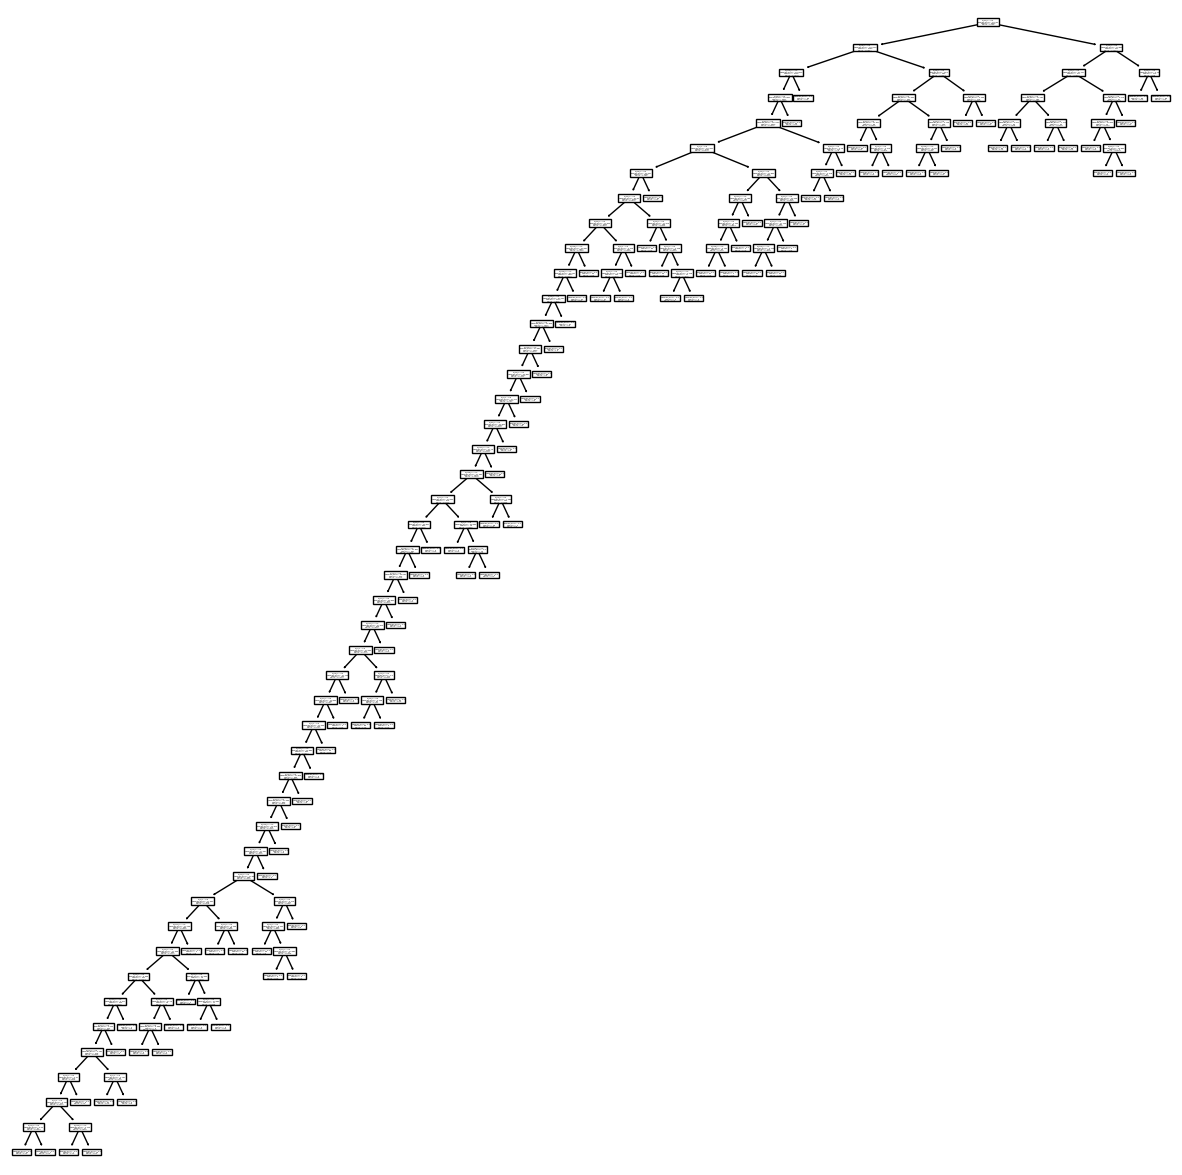

In [ ]:
#plotting the desion tree using matplotlib

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))
tree.plot_tree(dt_model);

In [ ]:

from sklearn.svm import SVC

# assigning decision tree regressor to dt_model


sv_model = SVC()

#fitting decision tree model

sv_model.fit(x_train,y_train)

#predicting the rsult using test data

y_pred = dt_model.predict(x_test)

In [ ]:
training_score_3 = sv_model.score(x_train,y_train)
training_score_3

1.0

In [ ]:
testing_score_3 = sv_model.score(x_test,y_test)
testing_score_3

1.0

In [ ]:
#calculating errors and r2 score
mae_3 = mean_absolute_error(y_test,y_pred)
rmse_3 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_3 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_3,3))
print("root_mean_squared_error:",round(rmse_3,3))
print("r2_score:",round(r2_3,3))

mean_absolute_error: 0.0
root_mean_squared_error: 0.0
r2_score: 1.0


In [ ]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor()

# fitiing model to the data

rf_model.fit(x_train,y_train)

#predicting the result using the test data

y_pred = rf_model.predict(x_test)

In [ ]:
training_score_4 = rf_model.score(x_train,y_train)
training_score_4

0.9999775378597756

In [ ]:
testing_score_4 = rf_model.score(x_test,y_test)
testing_score_4

0.9999579273668506

In [ ]:
#calculating errors and r2 score
mae_4 = mean_absolute_error(y_test,y_pred)
rmse_4 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_4 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_4,3))
print("root_mean_squared_error:",round(rmse_4,3))
print("r2_score:",round(r2_4,3))

mean_absolute_error: 0.015
root_mean_squared_error: 0.077
r2_score: 1.0


In [ ]:

from sklearn.naive_bayes import GaussianNB


nb_model = GaussianNB()

# fitiing model to the data

nb_model.fit(x_train,y_train)

#predicting the result using the test data

y_pred = rf_model.predict(x_test)

In [ ]:
training_score_5 = nb_model.score(x_train,y_train)
training_score_5

1.0

In [ ]:
testing_score_5= nb_model.score(x_test,y_test)
testing_score_5

1.0

In [ ]:
#calculating errors and r2 score
mae_5 = mean_absolute_error(y_test,y_pred)
rmse_5 = np.sqrt(mean_squared_error(y_test,y_pred))
r2_5 = r2_score(y_test,y_pred)

print("mean_absolute_error:",round(mae_5,3))
print("root_mean_squared_error:",round(rmse_5,3))
print("r2_score:",round(r2_5,3))

mean_absolute_error: 0.015
root_mean_squared_error: 0.077
r2_score: 1.0


<ipython-input-31-0b2b1ee572f1>:30: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds = [mode([i,j,k,l,m])[0][0] for i,j,k,l,


Accuracy on Test dataset by the combined model: 100.0


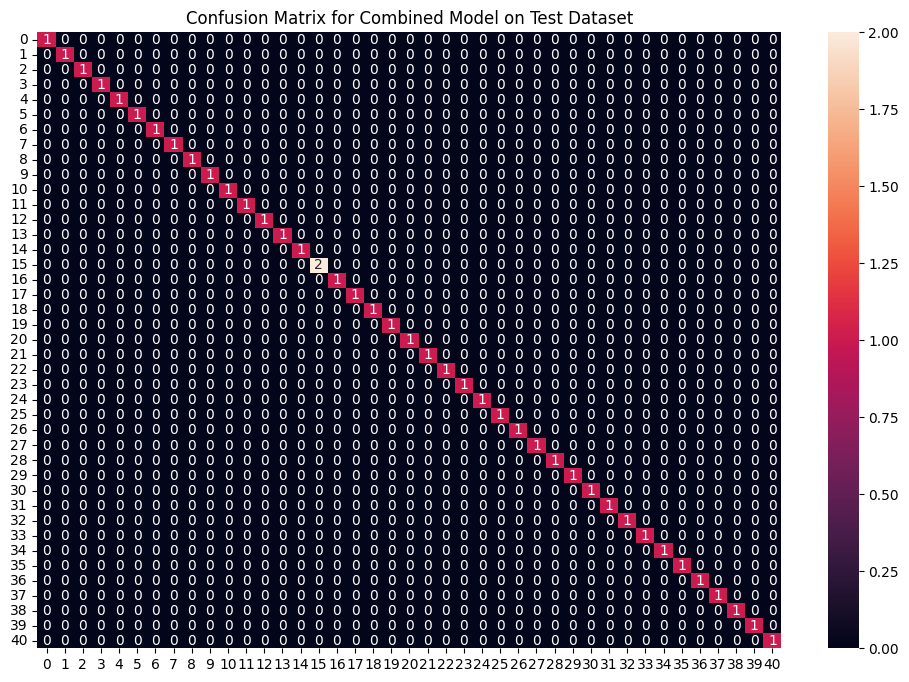

In [ ]:
# Training the models on whole data

final_nb_model = GaussianNB()
final_sv_model = SVC()
final_dt_model = DecisionTreeRegressor()
final_Lr_model = LinearRegression()
final_rf_model = RandomForestRegressor()
_
final_sv_model.fit(x, y)
final_nb_model.fit(x, y)
final_rf_model.fit(x, y)
final_Lr_model.fit(x, y)
final_dt_model.fit(x, y)


# Reading the test data
test_data = pd.read_csv("/content/drive/MyDrive/PROJECT ML/Testing.csv").dropna(axis=1)

test_x = test_data.iloc[:, :-1]
test_y = encoder.transform(test_data.iloc[:, -1])

# Making prediction by take mode of predictions
# made by all the classifiers
sv_preds = final_sv_model.predict(test_x)
nb_preds = final_nb_model.predict(test_x)
rf_preds = final_rf_model.predict(test_x)
Lr_preds = final_Lr_model.predict(test_x)
dt_preds = final_dt_model.predict(test_x)

final_preds = [mode([i,j,k,l,m])[0][0] for i,j,k,l,
			m in zip(sv_preds, nb_preds, rf_preds,dt_preds,Lr_preds)]

print(f"Accuracy on Test dataset by the combined model\
: {accuracy_score(test_y, final_preds)*100}")

cf_matrix = confusion_matrix(test_y, final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()
